La première fonction permet la création d'un graphique représentant l'évolution de la temperature moyenne de la terre sur dix milles ans. L'équation utilisée pour la simulation est la suivante : $R\dfrac{dT}{t} = Q(1 − α) − σT^4$. 

Plusieurs fonctions sont déssinées, avec comme seul changement la variation de $\alpha$ qui représente ici l'albédo de la planète.

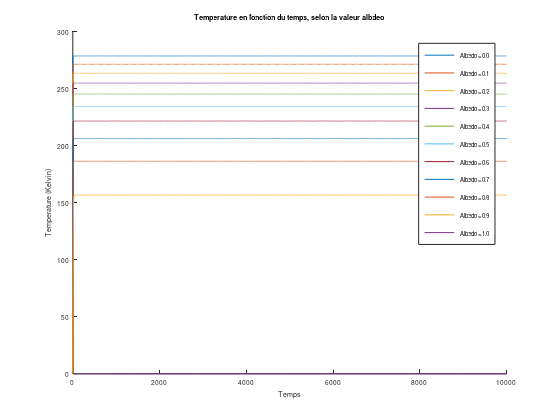

In [1]:
function simul_albedo(condition_initiale, albedo_range)
    # Paramètres
    R = 2.912;
    Q = 342;
    sigma = (5.67) * (10^-8);
    temps_simulation = [0, 10^4];

    hold on; # Pour ne pas effacer le graphique à chaque nouvelle appel du plot
    for albedo = albedo_range
        xdot = @(t, T) (Q * (1 - albedo) - (sigma * T.^4)) / R; # Définition système
        [t, T] = ode45(xdot, temps_simulation, condition_initiale); # Résolution système
        plot(t, T, 'DisplayName', sprintf('Albedo = %.1f', albedo));
    end

    hold off; # Libère la fonction plot
    legend('show');
    xlabel('Temps');
    ylabel('Temperature (Kelvin)');
    title('Temperature en fonction du temps, selon la valeur albdeo');
end

condition_initiale = 0;
albedo_range = 0:0.1:1; # Les valeurs de l'albedo parcourt l'intervalle de 0 à 1 par saut de 0.1
simul_albedo(condition_initiale, albedo_range)

La deuxième fonction permet la création d'un graphique représentant l'évolution de la temperature moyenne de la terre sur dix ans. L'équation utilisée pour la simulation est la suivante : $R\dfrac{dT}{t} = Q(1 − α) − \epsilon σT^4$. La seule différence avec la fonction précedente est l'ajout de $\epsilon$ qui représente le facteur d'émissivité de la planète.

Plusieurs fonctions sont déssinées, avec comme seul changement la variation de $\epsilon$.

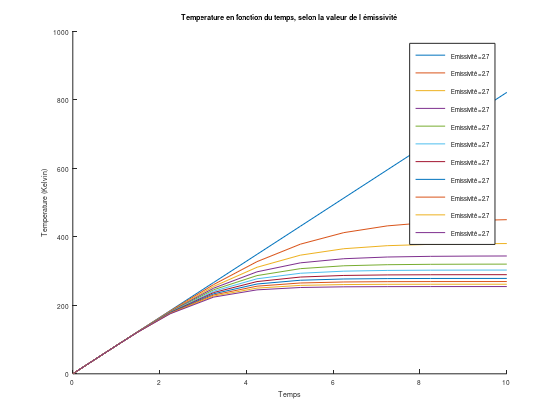

In [2]:
function simul_e(condition_initiale, epsilon_range)
    # Paramètres
    R = 2.912;
    Q = 342;
    sigma = (5.67) * (10^-8);
    temps_simulation = [0, 10];
    albedo = 0.3;
    
    hold on; # Pour ne pas effacer le graphique à chaque nouvelle appel du plot
    for epsilon = epsilon_range
        xdot = @(t, T) (Q * (1 - albedo) - (epsilon*sigma * T.^4)) / R; # Définition système, la seule chose qui change est l'ajout du facteur d'emmisivité
        [t, T] = ode45(xdot, temps_simulation, condition_initiale); # Résolution système
        plot(t, T, 'DisplayName', sprintf('Emissivité = %.1f', e));
    end

    hold off; # Libère la fonction plot
    legend('show');
    xlabel('Temps');
    ylabel('Temperature (Kelvin)');
    title('Temperature en fonction du temps, selon la valeur de l émissivité');
end

condition_initiale = 0;
epsilon_range = 0:0.1:1; # Les valeurs de epsilon parcourent l'intervalle de 0 à 1 par saut de 0.1
simul_e(condition_initiale, epsilon_range)

La troisième fonction permet la création d'un graphique représentant l'évolution de la température moyenne de la terre sur dix ans. L'équation utilisée pour la simulation est la suivante : $R\dfrac{dT}{t} = Q(1 − α) − (A+BT)$. Cette fonction ne dépend de la temperature que de façon linéaire et plus de façon quadratique comme avant.

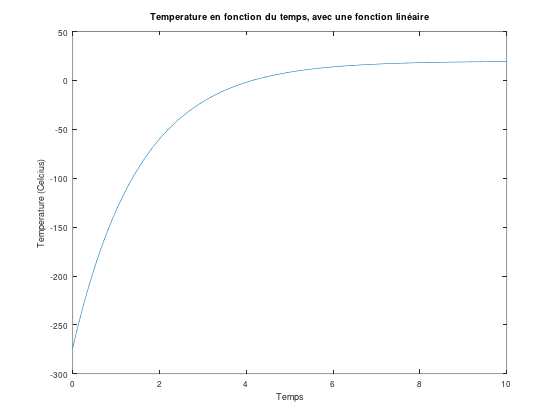

In [6]:
function fonctionLineaire (condition_initiale)
# Paramètres
    A = 202;
    B = 1.9;
    albedo = 0.3;
    temps_simulation = [0, 10];
    Q = 342;
    R = 2.912;
    
    xdot = @(t, T) ((Q*(1-albedo))-(A+(B*T)))/R; # Définition système
    [t,T] = ode45(xdot, temps_simulation, condition_initiale); # Résolution système
    plot(t,T)
    xlabel('Temps');
    ylabel('Temperature (Celcius)');
    title('Temperature en fonction du temps, avec une fonction linéaire');
endfunction
condition_initiale = -273.15; # -273.15 C° équivaut au 0K. 
fonctionLineaire (condition_initiale)

La quatrième et dernière fonction permet la création d'un graphique représentant l'évolution de la température moyenne de la terre sur cents ans. L'équation utilisée pour la simulation est la suivante : $R\dfrac{dT}{t} = Q(1 − α(T)) − (A+BT)$. Ici l'albédo vaut $0.5+0.2tanh(0.1(265-T-273.5))$ et est donc une fonction dépendante de la température de la terre.

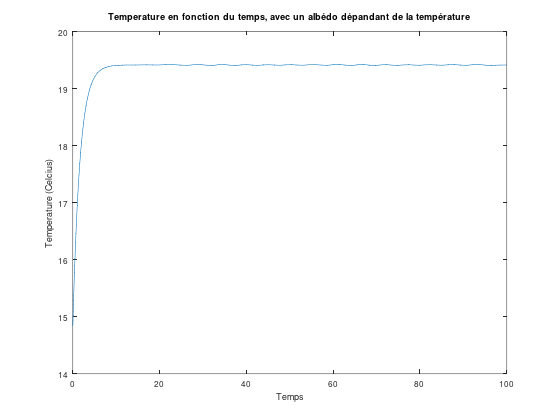

In [4]:
function albedoFonctionT (conditionInitiale)
# Paramètres
    A = 202;
    B = 1.9;
    tempsSimulation = [0, 100];
    Q = 342;
    R = 2.912;
    
    xdot = @(t, T) (Q*(1-(0.5+ 0.2*tanh(0.1*(265- T - 273.5))))-(A+(B*T)))/R; # Définition système
    [t,T] = ode45(xdot, tempsSimulation, conditionInitiale); # Résolution système
    plot(t,T)
    xlabel('Temps');
    ylabel('Temperature (Celcius)');
    title('Temperature en fonction du temps, avec un albédo dépandant de la température');
endfunction
conditionInitiale = 14.84;
albedoFonctionT (conditionInitiale)
